In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('theroundup_daum.csv', encoding = "cp949")


sentiment=[]

# 평점 8점이상을 긍정적 리뷰 5점 이하는 부정적 리뷰로 취급
for row in df['rating']:
    if row > 7:
        sentiment.append(1)
    elif 6<= row <= 7:
        sentiment.append(2)
    else :
        sentiment.append(0)

In [2]:
df['sentiment'] = sentiment

In [3]:
# 6,7점 평점은 데이터에서 삭제
delete = df[df['sentiment']==2].index
df.drop(delete, inplace=True)

df

,rating,review,sentiment
0,10,오늘 나의 해방일지 프리퀄인 범죄도시2를 보고왔습니다.\n구씨가 왜 도랑을 뛰어넘고...,1
1,1,15세 영화라니. 정말 기가 막힙니다. 이제 수위가 사라졌나요. 사람은 보고 들은 ...,0
2,10,"오늘 봤는데, 액션과 유머가 적절히 섞인 재미난 영화 한편이었어요^^ 새로운 감독에...",1
3,3,아무리 흥행을 위해서라지만 너무 잔인합니다. 왜 우리 한국 영화가 이리도 잔인하게...,0
4,9,속편은 별로다는 선입견으로 별 기대 안하고 봤는데 전편만큼 재미있네요. 오락 영화로 만족,1
...,...,...,...
1325,1,마동석도 이제 53살인데 힘으로 몰아붙이는 역할로는 이제 좀 아닌가 싶다.\n\n안...,0
1326,3,솔직히 7점 정도인데 평점조정위해 6점 남깁니다\n\n1편에 비하면 진짜 반도 ...,0
1327,1,코로나 풀리고 오랜만에 극장에서 영화보니까 설레서 평점 준건지 알바들인지.\n여전히...,0
1328,8,근데 다음은 진짜 장애인 좌파조선족들이 많기는함\n갑자기 영화 평가에 박근혜 이명박...,1


<AxesSubplot:>

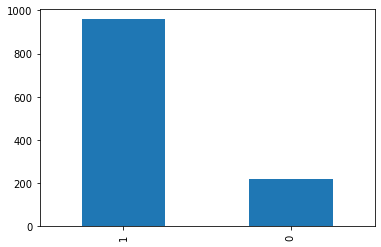

In [4]:
#긍정적 리뷰와 부정적 리뷰의 수
df['sentiment'].value_counts().plot(kind = 'bar')

In [5]:
# 한글과 공백을 제외하고 모두 제거
df['review'] = df['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

C:\Users\ginzi\AppData\Local\Temp\ipykernel_3452\1979820075.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [6]:
df['review'] = df['review'].str.replace('^ +', "")
df['review'].replace('', np.nan, inplace=True)
print(df.isnull().sum())

rating        0
review       27
sentiment     0
dtype: int64


C:\Users\ginzi\AppData\Local\Temp\ipykernel_3452\138521447.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace('^ +', "")


In [7]:
# 리뷰의 내용이 없는 것들 제거
df = df.dropna(how = 'any')
print(len(df))

1150


In [8]:
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
okt = Okt()

In [10]:
df2 = []
for sentence in tqdm(df['review']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    df2.append(stopwords_removed_sentence)

100%|█████████████████████████████████████████████████████████████████████████████| 1150/1150 [00:07<00:00, 161.46it/s]


In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df2)

In [12]:
print(tokenizer.word_index)

{'보다': 1, '영화': 2, '편': 3, '마동석': 4, '재밌다': 5, '을': 6, '석': 7, '손': 8, '액션': 9, '너무': 10, '있다': 11, '범죄': 12, '구': 13, '좋다': 14, '이다': 15, '더': 16, '되다': 17, '잔인하다': 18, '재미있다': 19, '연기': 20, '없다': 21, '도시': 22, '만': 23, '가다': 24, '로': 25, '나오다': 26, '다': 27, '시간': 28, '배우': 29, '님': 30, '장첸': 31, '구씨': 32, '넘다': 33, '에서': 34, '보고': 35, '같다': 36, '재다': 37, '않다': 38, '아니다': 39, '진짜': 40, '정말': 41, '재미': 42, '자다': 43, '시원하다': 44, '오다': 45, '역시': 46, '적': 47, '최고': 48, '고': 49, '안': 50, '모르다': 51, '게': 52, '요': 53, '못': 54, '만들다': 55, '것': 56, '생각': 57, '기대': 58, '나': 59, '인': 60, '편이': 61, '점': 62, '전편': 63, '장면': 64, '많이': 65, '많다': 66, '그냥': 67, '스토리': 68, '말': 69, '관람': 70, '들다': 71, 'ㅋㅋ': 72, '코믹': 73, '볼': 74, '하고': 75, '세': 76, '지': 77, '사람': 78, '장': 79, '네': 80, 'ㅋ': 81, '악역': 82, '그렇다': 83, '또': 84, '통쾌하다': 85, '느낌': 86, 'ㅎ': 87, 'ㅎㅎ': 88, '형사': 89, '까지': 90, '편도': 91, '이렇다': 92, '웃기다': 93, '웃다': 94, '때': 95, '주다': 96, '아': 97, '천만': 98, '오늘': 99, '싶다': 100, '평점': 101, '웃음': 102

In [13]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 3314
등장 빈도가 2번 이하인 희귀 단어의 수: 2265
단어 집합에서 희귀 단어의 비율: 68.34640917320459
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 15.330029285875197


In [14]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 1050


In [15]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(df2)
df2 = tokenizer.texts_to_sequences(df2)

In [16]:
df3 = np.array(df['sentiment'])

In [17]:
drop_df2 = [index for index, sentence in enumerate(df2) if len(sentence) < 1]

In [18]:
df2 = np.delete(df2, drop_df2, axis=0)
df3 = np.delete(df3, drop_df2, axis=0)
print(len(df2))
print(len(df3))

1140
1140


C:\Users\ginzi\anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


리뷰의 최대 길이 : 103
리뷰의 평균 길이 : 13.187719298245614


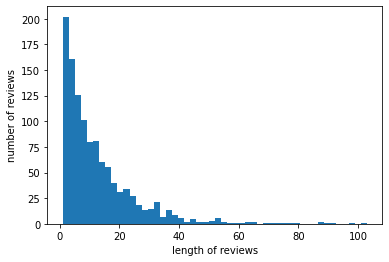

In [19]:
print('리뷰의 최대 길이 :',max(len(review) for review in df2))
print('리뷰의 평균 길이 :',sum(map(len, df2))/len(df2))
plt.hist([len(review) for review in df2], bins=50)
plt.xlabel('length of reviews')
plt.ylabel('number of reviews')
plt.show()

In [20]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [21]:
max_len = 40
below_threshold_len(max_len, df2)

전체 샘플 중 길이가 40 이하인 샘플의 비율: 95.96491228070175


In [22]:
df2 = pad_sequences(df2, maxlen=max_len)

In [23]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(df2, df3, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
15/15 [==============================] - ETA: 0s - loss: 0.5663 - acc: 0.7917
Epoch 1: val_acc improved from -inf to 0.85526, saving model to best_model.h5
15/15 [==============================] - 4s 82ms/step - loss: 0.5663 - acc: 0.7917 - val_loss: 0.4318 - val_acc: 0.8553
Epoch 2/15
15/15 [==============================] - ETA: 0s - loss: 0.4584 - acc: 0.8059
Epoch 2: val_acc improved from 0.85526 to 0.85965, saving model to best_model.h5
15/15 [==============================] - 1s 43ms/step - loss: 0.4584 - acc: 0.8059 - val_loss: 0.5133 - val_acc: 0.8596
Epoch 3/15
15/15 [==============================] - ETA: 0s - loss: 0.3941 - acc: 0.8191
Epoch 3: val_acc did not improve from 0.85965
15/15 [==============================] - 1s 40ms/step - loss: 0.3941 - acc: 0.8191 - val_loss: 0.3479 - val_acc: 0.8553
Epoch 4/15
15/15 [==============================] - ETA: 0s - loss: 0.3086 - acc: 0.8706
Epoch 4: val_acc did not improve from 0.85965
15/15 [==========================

In [24]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(df2, df3)[1]))

36/36 [==============================] - 1s 8ms/step - loss: 0.2072 - acc: 0.9289

 테스트 정확도: 0.9289


In [25]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [26]:
sentiment_predict('개꿀잼ㅋㅋ')

1/1 [==============================] - 0s 484ms/step
79.48% 확률로 긍정 리뷰입니다.



In [30]:
sentiment_predict('노잼')

1/1 [==============================] - 0s 21ms/step
64.44% 확률로 긍정 리뷰입니다.



In [28]:
sentiment_predict('이딴게 영화냐 ㅉㅉ')

1/1 [==============================] - 0s 22ms/step
53.40% 확률로 긍정 리뷰입니다.



In [29]:
sentiment_predict('대박 또보고싶음')

1/1 [==============================] - 0s 20ms/step
90.40% 확률로 긍정 리뷰입니다.

